# Densest Subgraph

A subgraph is a graph formed by a set of vertices (and appropriate set of edges) in a given graph. The densest k-subgraph problem is the problem of finding a k-vertex subgraph of a graph with the maximum number of edges.

For example, in the picture below we see a 5-subgraph (or a subgraph with 5 vertices) which happens to also be densest. If we pick any other 5-subgraph in this graph, the number of edges in the subgraph will be less than the one given below.

![Image of subgraph](https://upload.wikimedia.org/wikipedia/commons/a/ae/Dense_subgraph.png)

In this question, you are asked to use the integer programming formulation to solve for k-densest subgraph of a given graph. For the purpose of answer checking, the densest 4-subgraph for the WS graph in the line below is the subgraph containing node (1,3,4,5).

### Hint

You might need to define variables for all the nodes and edges. Once one particular edge is "picked", then the nodes that this edges connect must also be picked. For example, we have binary variables: $n_0$, $n_1$ and $e_{(0,1)}$ to indicate whether node 0, 1 and edge(0,1) are picked and included in the subgraph. Clearly, we cannot pick edge(0,1) but not node 0 or 1. One way to implement this constraint is to write:

$n_0 + n_1 \ge 2e_{(0,1)}$


In [455]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable, LpMinimize
import pulp

In [513]:
total_node=30
G = nx.watts_strogatz_graph(n = 30, k = 10, p = 0.4, seed = 2002)

In [489]:
total_node=8
G=nx.Graph()
for i in range(0, 8):
    G.add_node(i)

G.add_edges_from([(0, 1), (1, 2), (1, 7), (2, 3), (2, 4), (2, 7), (3, 4), (3, 7), (4, 5), (5, 6), (6, 7)])

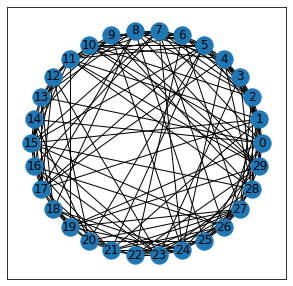

In [514]:
plt.figure(figsize=(5, 5))
pos=nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [469]:
print(G.nodes)
print(G.edges)
print(G.subgraph([1, 2, 3, 4, 7]).number_of_edges())

[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 1), (1, 2), (1, 7), (2, 3), (2, 4), (2, 7), (3, 4), (3, 7), (4, 5), (5, 6), (6, 7)]
7


In [561]:
model=LpProblem(name='densest_subgraph', sense=LpMaximize)
k=9

In [562]:
x={i: LpVariable(name=f'n{i}', cat='Binary') for i in range(total_node)}
print(x)
y={e: LpVariable(name=f'e{e}', cat='Binary') for index, e in enumerate(G.edges)}
y

{0: n0, 1: n1, 2: n2, 3: n3, 4: n4, 5: n5, 6: n6, 7: n7, 8: n8, 9: n9, 10: n10, 11: n11, 12: n12, 13: n13, 14: n14, 15: n15, 16: n16, 17: n17, 18: n18, 19: n19, 20: n20, 21: n21, 22: n22, 23: n23, 24: n24, 25: n25, 26: n26, 27: n27, 28: n28, 29: n29}


{(0, 1): e(0,_1),
 (0, 29): e(0,_29),
 (0, 2): e(0,_2),
 (0, 3): e(0,_3),
 (0, 26): e(0,_26),
 (0, 25): e(0,_25),
 (0, 10): e(0,_10),
 (0, 14): e(0,_14),
 (0, 19): e(0,_19),
 (0, 13): e(0,_13),
 (0, 7): e(0,_7),
 (1, 2): e(1,_2),
 (1, 3): e(1,_3),
 (1, 4): e(1,_4),
 (1, 28): e(1,_28),
 (1, 5): e(1,_5),
 (1, 26): e(1,_26),
 (1, 11): e(1,_11),
 (1, 21): e(1,_21),
 (1, 15): e(1,_15),
 (1, 29): e(1,_29),
 (1, 27): e(1,_27),
 (1, 17): e(1,_17),
 (2, 3): e(2,_3),
 (2, 4): e(2,_4),
 (2, 5): e(2,_5),
 (2, 29): e(2,_29),
 (2, 6): e(2,_6),
 (2, 28): e(2,_28),
 (2, 7): e(2,_7),
 (2, 27): e(2,_27),
 (2, 8): e(2,_8),
 (2, 10): e(2,_10),
 (3, 4): e(3,_4),
 (3, 5): e(3,_5),
 (3, 6): e(3,_6),
 (3, 7): e(3,_7),
 (3, 28): e(3,_28),
 (3, 23): e(3,_23),
 (4, 5): e(4,_5),
 (4, 8): e(4,_8),
 (4, 17): e(4,_17),
 (4, 28): e(4,_28),
 (4, 24): e(4,_24),
 (4, 10): e(4,_10),
 (5, 6): e(5,_6),
 (5, 8): e(5,_8),
 (5, 10): e(5,_10),
 (5, 21): e(5,_21),
 (5, 7): e(5,_7),
 (5, 17): e(5,_17),
 (5, 20): e(5,_20),
 (5, 1

In [563]:
# constraints
for e in G.edges:
    #print(f'{e[0]} {e[1]}')
    model+=(x[e[0]]+x[e[1]] >= 2*y[(e[0], e[1])], f'constraint{e}')
    #model+=(x[e[0]]+x[e[1]] >= 1, f'constraint{e}')  
model+=lpSum(x[i] for i in range(total_node))==k

In [564]:
# objective function
model+=lpSum(y[e] for e in G.edges)
model

densest_subgraph:
MAXIMIZE
1*e(0,_1) + 1*e(0,_10) + 1*e(0,_13) + 1*e(0,_14) + 1*e(0,_19) + 1*e(0,_2) + 1*e(0,_25) + 1*e(0,_26) + 1*e(0,_29) + 1*e(0,_3) + 1*e(0,_7) + 1*e(1,_11) + 1*e(1,_15) + 1*e(1,_17) + 1*e(1,_2) + 1*e(1,_21) + 1*e(1,_26) + 1*e(1,_27) + 1*e(1,_28) + 1*e(1,_29) + 1*e(1,_3) + 1*e(1,_4) + 1*e(1,_5) + 1*e(10,_12) + 1*e(10,_29) + 1*e(11,_12) + 1*e(11,_13) + 1*e(11,_15) + 1*e(11,_19) + 1*e(11,_28) + 1*e(11,_29) + 1*e(12,_13) + 1*e(12,_15) + 1*e(12,_16) + 1*e(12,_17) + 1*e(12,_20) + 1*e(12,_23) + 1*e(13,_14) + 1*e(13,_15) + 1*e(13,_17) + 1*e(13,_18) + 1*e(14,_15) + 1*e(14,_16) + 1*e(14,_17) + 1*e(14,_18) + 1*e(14,_20) + 1*e(15,_16) + 1*e(15,_17) + 1*e(15,_23) + 1*e(15,_26) + 1*e(15,_28) + 1*e(16,_17) + 1*e(16,_19) + 1*e(16,_21) + 1*e(16,_23) + 1*e(16,_26) + 1*e(17,_18) + 1*e(17,_19) + 1*e(17,_21) + 1*e(18,_19) + 1*e(18,_20) + 1*e(18,_21) + 1*e(18,_23) + 1*e(18,_24) + 1*e(19,_20) + 1*e(19,_24) + 1*e(19,_27) + 1*e(19,_29) + 1*e(2,_10) + 1*e(2,_27) + 1*e(2,_28) + 1*e(2,_29) + 

In [565]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/a07b3a7412544f798239a6bd13b1ff39-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/a07b3a7412544f798239a6bd13b1ff39-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 156 COLUMNS
At line 1147 RHS
At line 1299 BOUNDS
At line 1480 ENDATA
Problem MODEL has 151 rows, 180 columns and 480 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 54.5 - 0.01 seconds
Cgl0004I processed model has 151 rows, 180 columns (180 integer (180 of which binary)) and 480 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 71 integers unsatisfied sum - 35.5
Cbc0038I Solution found of -19
Cbc0038I Before mini branch and bound, 109 integers at bound fixed and 0 continuous
Cbc0038I Full pro

1

In [566]:
LpStatus[model.status]

'Optimal'

In [567]:
cnt_edge=0
for var in model.variables():
    if var.value() > 0.5:
        print(f'{var.name}: {var.value()}')
        if var.name[0]=='e':
            cnt_edge+=1
            
print("No. of edges in ", k, "- densest subgraph is ", cnt_edge)

e(0,_1): 1.0
e(0,_10): 1.0
e(0,_2): 1.0
e(0,_29): 1.0
e(0,_3): 1.0
e(0,_7): 1.0
e(1,_2): 1.0
e(1,_29): 1.0
e(1,_3): 1.0
e(1,_4): 1.0
e(1,_5): 1.0
e(10,_29): 1.0
e(2,_10): 1.0
e(2,_29): 1.0
e(2,_3): 1.0
e(2,_4): 1.0
e(2,_5): 1.0
e(2,_7): 1.0
e(3,_4): 1.0
e(3,_5): 1.0
e(3,_7): 1.0
e(4,_10): 1.0
e(4,_5): 1.0
e(5,_10): 1.0
e(5,_7): 1.0
e(7,_10): 1.0
n0: 1.0
n1: 1.0
n10: 1.0
n2: 1.0
n29: 1.0
n3: 1.0
n4: 1.0
n5: 1.0
n7: 1.0
No. of edges in  9 - densest subgraph is  26


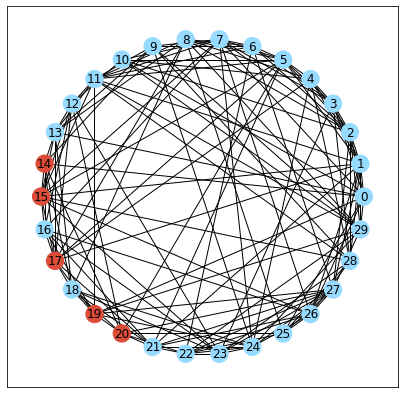

In [537]:
plt.figure(figsize=(7, 7))

color_map=[]
for i in range(len(model.variables())):
    if model.variables()[i].name[0]=='n' and model.variables()[i].value() > 0.5:
        color_map.append("#dd4b39")
    elif model.variables()[i].name[0]=='n':
        color_map.append("#96DBFF")

pos=nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color=color_map)